# **Lab 15: Rock, paper, scissors, Spock, lizard**

In [11]:
from pylab import *
from random import *
from time import sleep



### [Ascii art](https://www.asciiart.eu/) to make things more fun [(Also used)](https://gist.github.com/wynand1004/b5c521ea8392e9c6bfe101b025c39abe)

In [53]:
moves = {
    1: {
        "name": "Scissors",
        "art": """
            _______
        ---'   ____)____
                  ______)
               __________)
              (____)
        ---._(____)
        """
    },
    2: {
        "name": "Paper",
        "art": """
             _______
        ---'    ____)____
                   ______)
                  _______)
                 _______)
        ---.__________)
        """
    },
    3: {
        "name": "Rock",
        "art": """
            _______
        ---'   ____)
              (_____)
              (_____)
              (____)
        ---._(____)
        """
    },
    4: {
        "name": "Lizard",
        "art": """
           _     _
          /_\\~~/_\\
         (o o) (o o)
        _\\_/___\\_/__
       (             )
        \\___________/
         ^^       ^^
        """
    },
    5: {
        "name": "Spock",
        "art": """
  ____                   _    
 / ___| _ __   ___   ___| | __
 \\___ \\| '_ \\ / _ \\ / __| |/ /
  ___) | |_) | (_) | (__|   < 
 |____/| .__/ \\___/ \\___|_|\\_\\
       |_|                     
        """
    }
}

vs_art = """
 ___      ___ ________          
|\  \    /  /|\   ____\         
\ \  \  /  / | \  \___|_        
 \ \  \/  / / \ \_____  \       
  \ \    / /   \|____|\  \  ___ 
   \ \__/ /      ____\_\  \|\__\\
    \|__|/      |\_________\|__|
                \|_________|     
    """

# for key, value in moves.items():
#     print(f"{key} - {value['name']}")
#     print(value['art'])



# For fun
def printMenu():
    print(' .+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+. ')
    print('(        ___                           _                                              )')
    print(' )      F _ ",     ____      ____     FJ __                                          ( ')
    print('(      J `-\'(|    F __ J    F ___J.  J |/ /L                                          )')
    print(' )     |  _  L   | |--| |  | |---LJ  |    \\                                          ( ')
    print('(      F |\\_\\  L  F L__J J  F L___--. F L:\\ J   __                                     )')
    print(' )    J__| \\\\__LJ\\______/FJ\\______/FJ__L \\\\_J.J  L                                   ( ')
    print('(     |__|  J__| J______F  J______F |__L  \\L_||_F                                     )')
    print(' )       ___                                  |_F                                    ( ')
    print('(       F _ ",  ___ _    _ ___      ____     _ ___                                    )')
    print(' )     J `-\' | F __` L  J \'__ J    F __ J   J \'__ ",                                 ( ')
    print('(      |  __/F| |--| |  | |--| |  | _____J  | |__|-J                                  )')
    print(' )     F |__/ F L__J J  F L__J J  F L___--. F L  `-\'__                               ( ')
    print('(     J__|   J\\____,__LJ  _____/LJ\\______/FJ__L    J  L                               )')
    print(' )    |__L    J____,__F|_J_____F  J______F |__L    |_F                               ( ')
    print('(                      L_J                         |_F                                )')
    print(' )       ___             __                                                          ( ')
    print('(       F __".   ____    LJ    ____      ____      ____     _ ___    ____             )')
    print(' )     J (___|  F ___J.       F ___J    F ___J    F __ J   J \'__ ", F ___J           ( ')
    print('(      J\\___ \\ | |---LJ  FJ  | \'----_  | \'----_  | |--| |  | |__|-J| \'----_           )')
    print(' )    .--___) \\F L___--.J  L )-____  L )-____  L F L__J J  F L  `-\')-____  L __      ( ')
    print('(     J\\______J\\______/FJ__LJ\\______/FJ\\______/FJ\\______/FJ__L    J\\______/FJ  L      )')
    print(' )     J______FJ______F |__| J______F  J______F  J______F |__L     J______F |_F      ( ')
    print('(       FJ       LJ   _____     ___ _    _ ___    ___FJ                     |_F       )')
    print(' )     J |           [__   F   F __` L  J \'__ ", F __  L                             ( ')
    print('(      | |       FJ  `-.\'./  | |--| |  | |__|-J| |--| |                              )')
    print(' )     F L_____ J  L .\' (_(_  F L__J J  F L  `-\'F L__J J  __                         ( ')
    print('(     J________LJ__LJ_______LJ\\____,__LJ__L    J\\____,__LJ  L                         )')
    print(' )    |________||__||_______| J____,__F|__L     J____,__F|_F                         ( ')
    print('(        ___                                    _        |_F                          )')
    print(' )      F __".   _ ___      ____      ____     FJ __                                 ( ')
    print('(      J (___|  J \'__ J    F __ J    F ___J.  J |/ /L                                 )')
    print(' )     J\\___ \\  | |--| |  | |--| |  | |---LJ  |    \\                                 ( ')
    print('(     .--___) \\ F L__J J  F L__J J  F L___--. F L:\\ J                                 )')
    print(' )    J\\______JJ  _____/LJ\\______/FJ\\______/FJ__L \\\\_J.                              ( ')
    print('(      J______F|_J_____F  J______F  J______F |__L  \\L_|                               )')
    print(' )             L_J                                                                   ( ')
    print('(                                                                                     )')
    print(' "+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"  ')
    print(' .+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+. ')
    print('(                                                                                     )')
    print(' )     1 - Scissors   |   2 - Paper   |   3 - Rock   |   4 - Lizard   |   5 - Spock  ( ')
    print('(                                                                                     )')
    print(' )                         Please enter a selection:                                ( ')
    print('(                                                                                     )')
    print(' "+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"  ')

<>:60: SyntaxWarning: invalid escape sequence '\ '
<>:60: SyntaxWarning: invalid escape sequence '\ '
/var/folders/24/ggylxxcj3xq362xbyt3gkg_00000gn/T/ipykernel_71874/4209715174.py:60: SyntaxWarning: invalid escape sequence '\ '
  vs_art = """


### Game logic and UI

In [54]:

def suspense():
    for dots in [".", "..", "..."]:
        sleep(1)
        print(dots)
    
def printDuel(pMove, cMove):
    pArt = moves[pMove]["art"]
    cArt = moves[cMove]["art"]

    # Print the duel
    print(f"{pArt}\n{vs_art}\n{cArt}")

# helper
def compareMove(pMove, cMove):
    outcomes = {
        (1, 2): ("Scissors cut paper!", "Player wins!!"),
        (1, 4): ("Scissors decapitates lizard!", "Player wins!!"),
        (1, 5): ("Spock smashes scissors!", "Computer wins!!"),
        (1, 3): ("Rock crushes scissors!", "Computer wins!!"),
        (2, 3): ("Paper covers rock!", "Player wins!!"),
        (2, 5): ("Paper disproves Spock!", "Player wins!!"),
        (2, 1): ("Scissors cuts paper!", "Computer wins!!"),
        (2, 4): ("Lizard eats paper!", "Computer wins!!"),
        (3, 4): ("Rock crushes lizard!", "Player wins!!"),
        (3, 1): ("Rock crushes scissors!", "Player wins!!"),
        (3, 2): ("Paper covers rock!", "Computer wins!!"),
        (3, 5): ("Spock vaporizes rock!", "Computer wins!!"),
        (4, 5): ("Lizard poisons Spock!", "Player wins!!"),
        (4, 2): ("Lizard eats paper!", "Player wins!!"),
        (4, 3): ("Rock crushes lizard!", "Computer wins!!"),
        (4, 1): ("Scissors decapitates lizard!", "Computer wins!!"),
        (5, 1): ("Spock smashes scissors!", "Player wins!!"),
        (5, 3): ("Spock vaporizes rock!", "Player wins!!"),
        (5, 4): ("Lizard poisons Spock!", "Computer wins!!"),
        (5, 2): ("Paper disproves Spock!", "Computer wins!!")
    }

    # tie
    if pMove == cMove:
        printDuel(pMove, cMove)
        suspense()
        print("It's a tie!!")
        sleep(1)
        print("But wait..")
        sleep(1)
        print("But wait...")
        sleep(1)
        print("Computer hacks and chooses another move!!!")
        sleep(2)
        cheatMove = randint(1, 5)
        compareMove(pMove, cheatMove)
        return

    # other outcomes
    if (pMove, cMove) in outcomes:
        printDuel(pMove, cMove)
        suspense()
        print(outcomes[(pMove, cMove)][0])
        print(outcomes[(pMove, cMove)][1])
        
def simulateRound():
    printMenu()
    try:
        pMove = int(input(">> "))
        if pMove not in moves:
            print("Invalid choice! Please choose a number between 1 and 5.")
            return
        cMove = randint(1, 5)
        compareMove(pMove, cMove)
    except ValueError:
        print("Invalid input! Please enter a number.")


            
            

### Simulation of one round

In [55]:
simulateRound()

 .+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+.+"+. 
(        ___                           _                                              )
 )      F _ ",     ____      ____     FJ __                                          ( 
(      J `-'(|    F __ J    F ___J.  J |/ /L                                          )
 )     |  _  L   | |--| |  | |---LJ  |    \                                          ( 
(      F |\_\  L  F L__J J  F L___--. F L:\ J   __                                     )
 )    J__| \\__LJ\______/FJ\______/FJ__L \\_J.J  L                                   ( 
(     |__|  J__| J______F  J______F |__L  \L_||_F                                     )
 )       ___                                  |_F                                    ( 
(       F _ ",  ___ _    _ ___      ____     _ ___                                    )
 )     J `-' | F __` L  J '__ J    F __ J   J '__ ",                                 ( 
(      |  __/F| |--| |  | |--| 

### Part two 

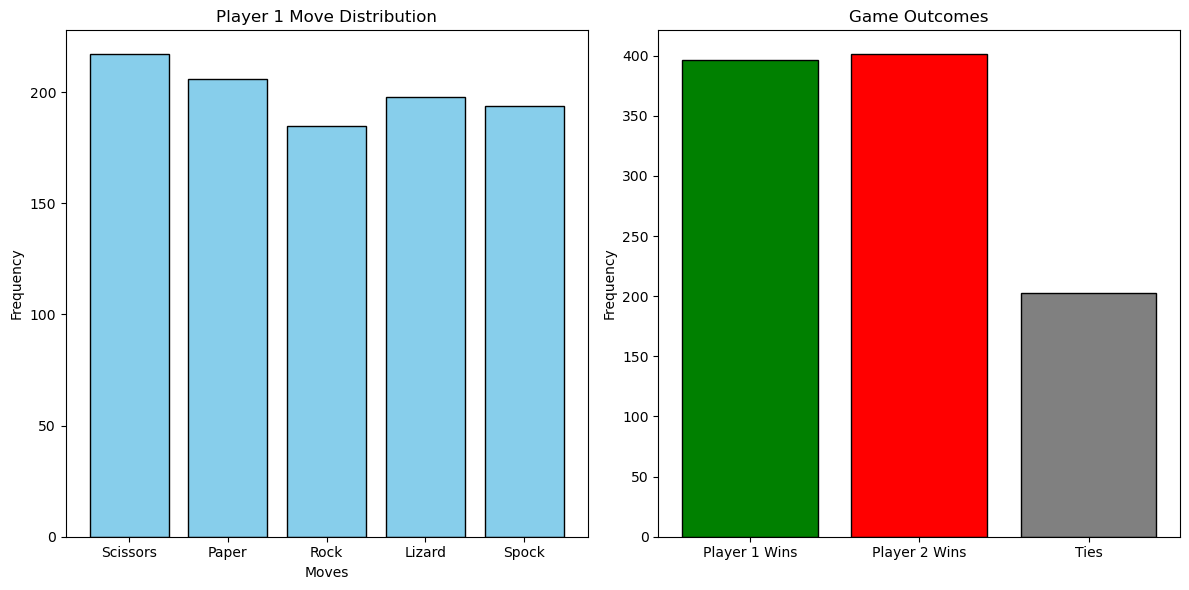

In [58]:
# simulate 1000 games
def simulate_games(n_games=1000):
    p1_moves = zeros(n_games)
    p2_moves = zeros(n_games)
    outcomes = {"p1_wins": 0, "p2_wins": 0, "ties": 0} #dict to keep track of accumalators 

    # outcome logic
    outcome_map = {
        (1, 2): "p1", (1, 4): "p1", (1, 5): "p2", (1, 3): "p2",
        (2, 3): "p1", (2, 5): "p1", (2, 1): "p2", (2, 4): "p2",
        (3, 4): "p1", (3, 1): "p1", (3, 2): "p2", (3, 5): "p2",
        (4, 5): "p1", (4, 2): "p1", (4, 3): "p2", (4, 1): "p2",
        (5, 1): "p1", (5, 3): "p1", (5, 4): "p2", (5, 2): "p2",
    }

    for i in range(n_games):
        p1 = randint(1, 5)
        p2 = randint(1, 5)
        p1_moves[i] = p1
        p2_moves[i] = p2

        if p1 == p2:
            outcomes["ties"] += 1
        else:
            winner = outcome_map[(p1, p2)]

            if winner == "p1":
                outcomes["p1_wins"] += 1
            else:
                outcomes["p2_wins"] += 1

    return p1_moves, p2_moves, outcomes

def plotResults(p1_moves, outcomes):
    figure(figsize=(12, 6))

    # move distribution
    subplot(1, 2, 1)
    hist(p1_moves, bins = arange(1, 7) - 0.5, rwidth = 0.8, color = 'skyblue', edgecolor = 'black')
    xticks(range(1, 6), ['Scissors', 'Paper', 'Rock', 'Lizard', 'Spock'])
    xlabel('Moves')
    ylabel('Frequency')
    title('Player 1 Move Distribution')

    # outcomes
    subplot(1, 2, 2)
    categories = ['Player 1 Wins', 'Player 2 Wins', 'Ties']
    counts = [outcomes["p1_wins"], outcomes["p2_wins"], outcomes["ties"]]
    bar(categories, counts, color = ['green', 'red', 'gray'], edgecolor = 'black')
    ylabel('Frequency')
    title('Game Outcomes')

    tight_layout()
    show()

# Simulate and plot
n_games = 1000
p1_moves, p2_moves, outcomes = simulate_games(n_games)
plotResults(p1_moves, outcomes)
